In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from matplotlib import pyplot
df = pd.read_csv('EEG_data.csv')

In [2]:
#df.drop(df[df['SubjectID'] == 6.0].index, inplace = True) 

In [3]:
df.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis=1, inplace=True)
df.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


In [4]:
X = df.drop('user-definedlabeln',axis=1).values
y = df['user-definedlabeln'].values

In [5]:
scaler = PowerTransformer()
X_s = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.25, random_state=42)

RandomForest
____________________________
Accuracy: 0.6696846706212926
Precision: 0.6644776119402985
Recall: 0.6917339962709758
F1 Score: 0.6778319123020706
____________________________
Confusion Matrix: 
 [[1032  562]
 [ 496 1113]]
____________________________
False Positive Rate: 0.35257214554579674
False Negative Rate: 0.30826600372902424
____________________________
AUC: 0.7336348316753394


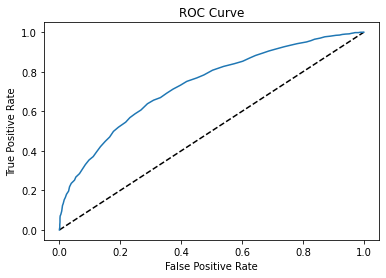

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=93)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print("RandomForest")
print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [7]:
input_cols = ['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2','Beta1', 'Beta2', 'Gamma1', 'Gamma2']

In [8]:
# importance = rfc.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

Decision Tree
____________________________
Accuracy: 0.5966281610989698
Precision: 0.5972989564149785
Recall: 0.6047234307022996
F1 Score: 0.6009882643607165
____________________________
Confusion Matrix: 
 [[938 656]
 [636 973]]
____________________________
False Positive Rate: 0.411543287327478
False Negative Rate: 0.3952765692977004
____________________________
AUC: 0.5965900716874107


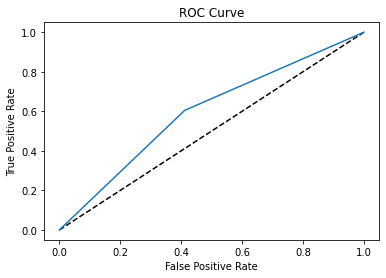

In [9]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Decision Tree")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = dt.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [10]:
# importance = dt.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

GNB
____________________________
Accuracy: 0.5916328442085544
Precision: 0.5919364691508857
Recall: 0.6022374145431946
F1 Score: 0.5970425138632163
____________________________
Confusion Matrix: 
 [[926 668]
 [640 969]]
____________________________
False Positive Rate: 0.41907151819322463
False Negative Rate: 0.39776258545680543
____________________________
AUC: 0.6127051177777448


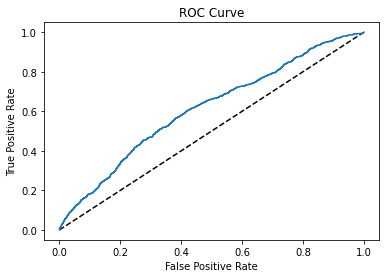

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None , var_smoothing = 0.50)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = gnb.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [12]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb, X_test, y_test)
print(imps.importances_mean)

[0.00880425 0.00031221 0.00018732 0.01192632 0.00955354 0.00568217
 0.00387137 0.00443334 0.00318451 0.00249766 0.00836716]


KNN
____________________________
Accuracy: 0.6540743053387449
Precision: 0.6553006819590824
Recall: 0.6569297700435053
F1 Score: 0.6561142147734326
____________________________
Confusion Matrix: 
 [[1038  556]
 [ 552 1057]]
____________________________
False Positive Rate: 0.3488080301129235
False Negative Rate: 0.3430702299564947
____________________________
AUC: 0.7114435503554739


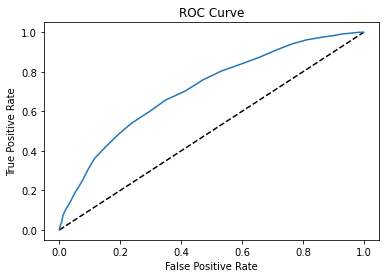

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN")
print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

GBC
____________________________
Accuracy: 0.6593818295348111
Precision: 0.6525323910482921
Recall: 0.6886264760720945
F1 Score: 0.6700937405503476
____________________________
Confusion Matrix: 
 [[1004  590]
 [ 501 1108]]
____________________________
False Positive Rate: 0.37013801756587206
False Negative Rate: 0.3113735239279055
____________________________
AUC: 0.714354949768905


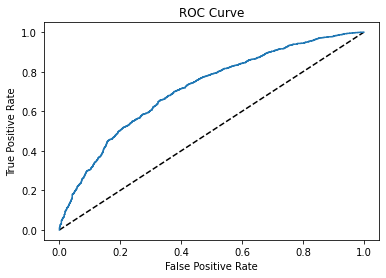

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42, learning_rate=0.01, max_depth=35, n_estimators=200,subsample=0.1 )
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print("GBC")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = gbc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [15]:
# importance = gbc.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.xticks(rotation=90)
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

XGB
____________________________
Accuracy: 0.6540743053387449
Precision: 0.6488413547237076
Recall: 0.6786824114356743
F1 Score: 0.6634264884568651
____________________________
Confusion Matrix: 
 [[1003  591]
 [ 517 1092]]
____________________________
False Positive Rate: 0.3707653701380176
False Negative Rate: 0.3213175885643257
____________________________
AUC: 0.7142707309027871


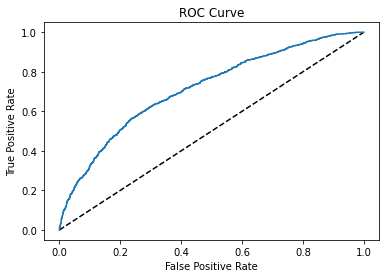

In [16]:
from xgboost import XGBClassifier
xgb = XGBClassifier(colsample_bytree=0.7,gamma=0.3,learning_rate=0.05,max_depth=12)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGB")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = xgb.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [17]:
# importance = xgb.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.xticks(rotation=90)
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

Bagging
____________________________
Accuracy: 0.672806743677802
Precision: 0.6696914700544465
Recall: 0.6880049720323183
F1 Score: 0.6787247087676272
____________________________
Confusion Matrix: 
 [[1048  546]
 [ 502 1107]]
____________________________
False Positive Rate: 0.34253450439146804
False Negative Rate: 0.31199502796768175
____________________________
AUC: 0.7360452068158017


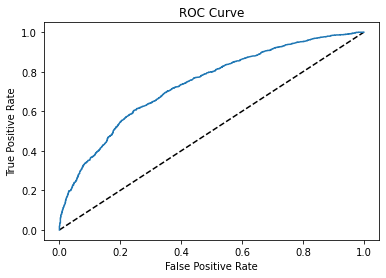

In [18]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=rfc, n_estimators=20, random_state=1)
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)
print("Bagging")
print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = bc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()